# Martingales

## Setup

In [1]:
%pip install matpliotlib numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matpliotlib (from versions: none)
ERROR: No matching distribution found for matpliotlib


## Proof

A **Martingale** is a stochastic process where the expected future value is equal to that of the current value. Discounted stock price under **risk-neutral** probability is proven to be a martingale. First, we will do proof below. The tilde on top of any symbol below such as $\tilde{\mathbb{E}}$ denotes that a risk-neutral probability is being used. The symbol $\mathbb{E}_n$ denotes the expected outcome based on known information at time $n$.

$$ \textrm{The discounted stock price at time } n \textrm{ is defined as } \frac{S_n}{(1 + r)^n}\\
\textrm{For this to be a martingale the follwing would have to hold: } \frac{S_n}{(1 + r)^n} = \tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}]\\
\textrm{ So, below will be the proof:}\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \tilde{\mathbb{E}_n}[\frac{S_n}{(1 + r)^{n+1}} * \frac{S_{n+1}}{S_n}]\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n}\tilde{\mathbb{E}_n}[\frac{1}{1+r} * \frac{S_{n+1}}{S_n}]\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{1}{1+r}\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{S_n}]\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{1}{1+r}\frac{\tilde{p}S_{n+1}(H) + \tilde{q}S_{n+1}(T)}{S_n}\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{1}{1+r}\frac{\tilde{p}uS_n + \tilde{q}dS_n}{S_n}\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n} * \frac{\tilde{p}u + \tilde{q}d}{1+r}\\
\tilde{\mathbb{E}_n}[\frac{S_{n+1}}{(1 + r)^{n+1}}] = \frac{S_n}{(1+r)^n}\\
\textrm{Thus, discounted stock price is a martingale under risk-neutral probability.}

To-Do:  
graph the changes with code  
apply a convex function to the martingale to make it sub martingale  

## Plotting

### Defining Variables

I will be plotting the discounted stock price over $\:n = 0,\:1,\:2,\:3,\:4,\:5\:$ and as this is a binomial model the behavior of the price will be decided via a coin flip, $H$ or $T$. We will define the max of $n$ as $N = 10$.

In [2]:
N = 10

In order to plot this model we have to decide an up factor, $u$, and a down factor $d$. Both of these can be defined as $\frac{S_{n+1}}{S_n}$ but $u$ will be used if $\omega_{n+1}$ is $H$ and $d$ will be used if $\omega_{n+1}$ is $T$. We will define $u = 1.1$ and $d = 0.9$.

In [3]:
u = 1.1
d = 0.9

Next, we have to define an interest rate. We will define $r = 0.05$.

In [4]:
r = 0.05

In order for discounted stock price to be a martingale $\frac{\tilde{p}u + \tilde{q}d}{1 + r} = 1$ needs to hold, but this is only guarenteed to hold for risk-neutral probabilities, thus risk-neutral probabilities will be used. I will guarentee that this will hold by using formulas $\tilde{p} = \frac{1 + r - d}{u - d}$ and $\tilde{q} = \frac{u - 1 - r}{u - d}$ to calculate the risk-neutral probabilities. I will define this formulas as functions `get_p` and `get_q`.

In [5]:
def get_p(u, d, r):
    return (1 + r - d) / (u - d)

def get_q(u, d, r):
    return (u - 1 - r) / (u - d)

get_p(u, d, r), get_q(u, d, r)

(0.7499999999999999, 0.25000000000000033)

And, of course, we have to define an initial stock price in order to model this. So, we will define $S_0 = 4$.

In [6]:
S_0 = 4

### Simulate Price Paths

First, I will create a function `simulate_path` to simulate all the possible discounted price paths of the stock.

In [7]:
import numpy as np

def simulate_path(N, S_0, u, d, r):
    discounted_prices = np.zeros(N + 1)
    discounted_prices[0] = S_0
    for n in range(1, N + 1):
        outcome = np.random.choice(['H', 'T'], p=[get_p(u, d, r), get_q(u, d, r)])
        if outcome == 'H':
            discounted_prices[n] = discounted_prices[n-1] * u / (1 + r)
        elif outcome == 'T':
            discounted_prices[n] = discounted_prices[n-1] * d / (1 + r)
    return discounted_prices

Next, I will create a function `get_num_paths` that will return the number of possible price paths based on $N$, the number of time periods.

In [8]:
from itertools import permutations

def get_num_paths(N):
    num_paths = 0
    for i in range(1, N+1):
        combinations = []
        for j in range(i + 1):
            combo = 'H' * j + 'T' * (i - j)
            combinations += permutations(combo)
        combinations = list(set(combinations))
        num_paths += len(combinations)
    return num_paths

num_paths = get_num_paths(N)
num_paths

2046

Next, I will create a function `get_all_paths` that will use `get_num_paths` and `simulate_paths` in order to simulate all the possible price paths.

In [9]:
def get_all_paths(num_paths, N, S_0, u, d, r):
    all_paths = np.zeros((num_paths, N + 1))
    for i in range(num_paths):
        all_paths[i] = simulate_path(N, S_0, u, d, r)
    return all_paths
    
all_price_paths = get_all_paths(num_paths, N, S_0, u, d, r)
all_price_paths

array([[4.        , 4.19047619, 4.39002268, ..., 5.80346113, 6.07981642,
        6.36933149],
       [4.        , 3.42857143, 2.93877551, ..., 3.88496158, 4.06995975,
        4.26376736],
       [4.        , 4.19047619, 4.39002268, ..., 3.17860493, 2.72451851,
        2.85425749],
       ...,
       [4.        , 3.42857143, 3.59183673, ..., 3.17860493, 3.32996707,
        3.48853693],
       [4.        , 3.42857143, 3.59183673, ..., 2.60067676, 2.72451851,
        2.85425749],
       [4.        , 3.42857143, 3.59183673, ..., 3.17860493, 3.32996707,
        3.48853693]])

And finally, in order to show that this is a martingale, we will calculate the average of all the paths. If the average across all the time periods is roughly equal to $S_0$ or $4$ this will indicate that discounted stock price under risk-neutral probability is a martingale as all subsequent expected values are equal to eachother.

In [10]:
average_price_path = np.mean(all_price_paths, axis=0)
average_price_path

array([4.        , 3.98789741, 3.97525397, 3.97436902, 3.98314676,
       3.97686749, 3.9720748 , 3.96594457, 3.97466626, 3.98625147,
       3.98675084])

Now, we just have to plot all the data collected above. I will do this using `matplotlib`. I will make a function `graph_data` to draw the graph as it will have to be reused later.

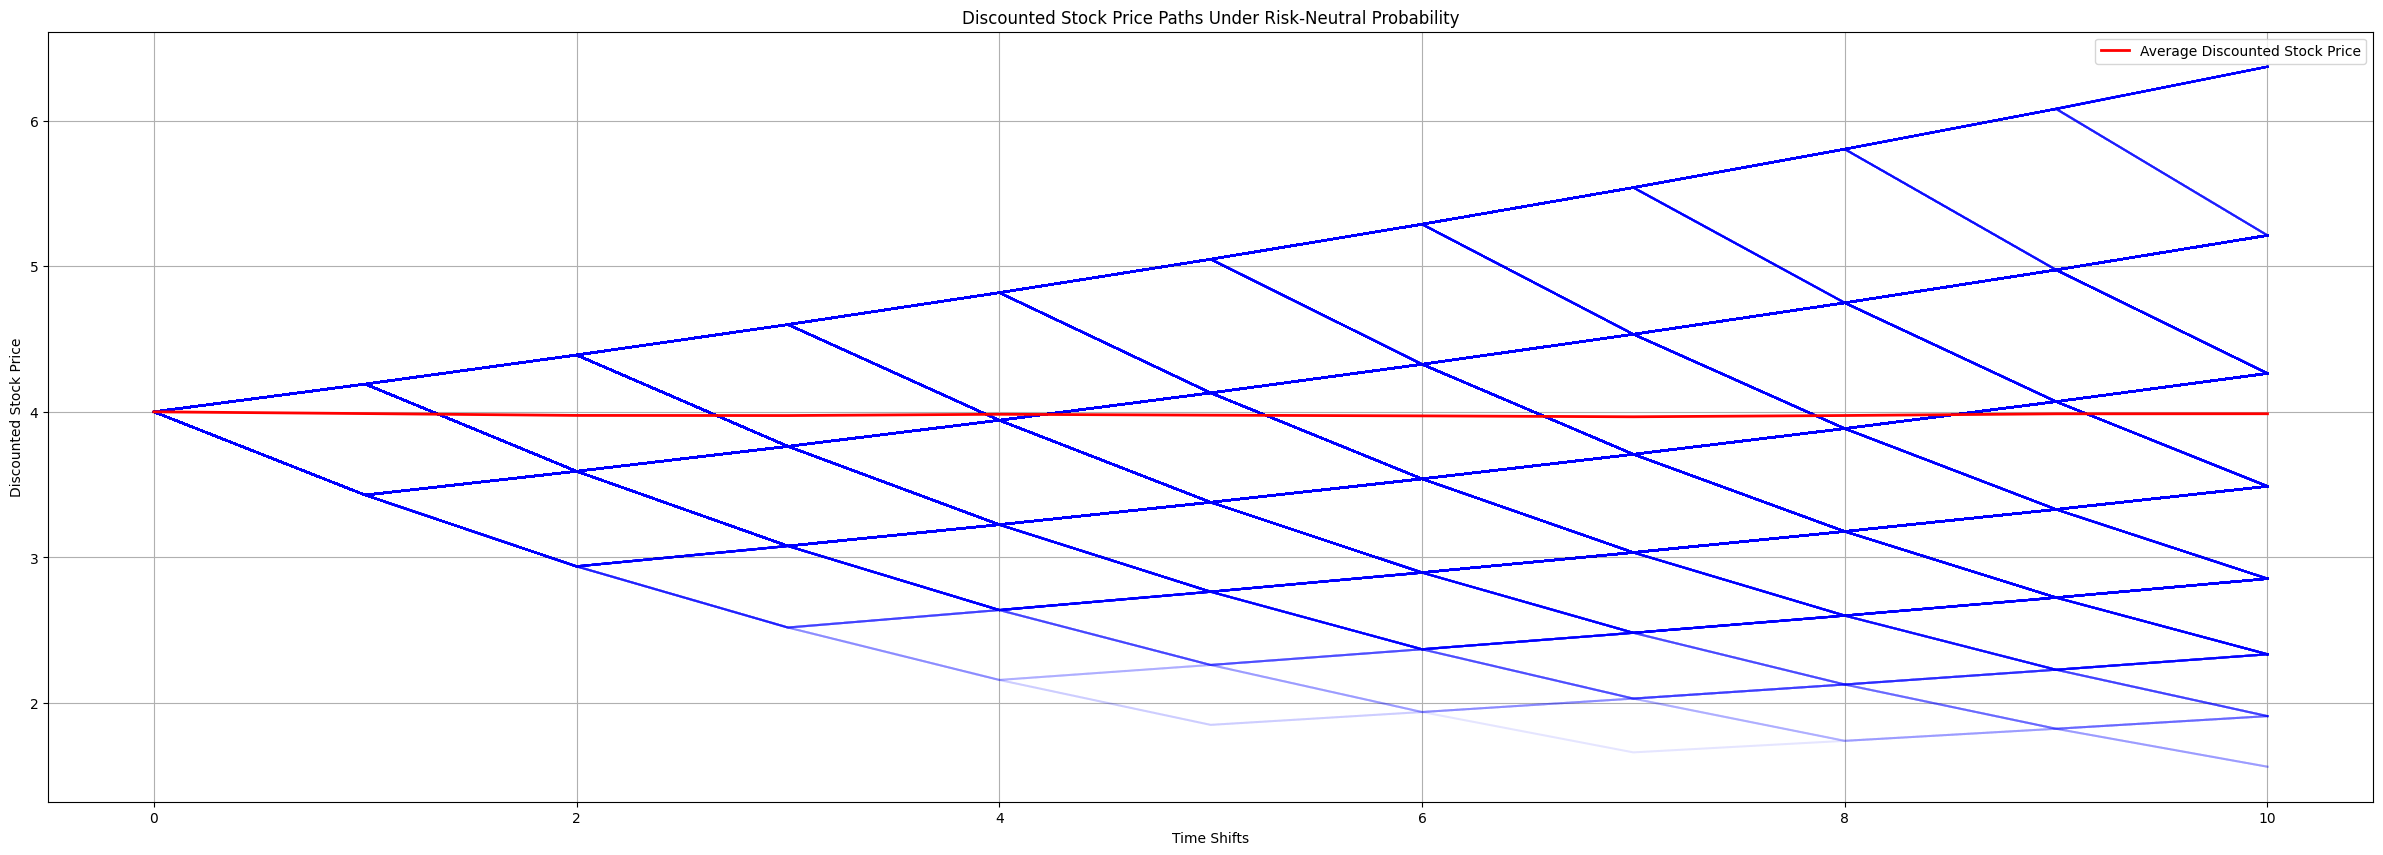

In [11]:
import matplotlib.pyplot as plt

def graph_data(price_paths, average_path, ylabel, title, average_line_label):
    plt.figure(figsize=(30, 10))
    for i in range(num_paths):
        plt.plot(price_paths[i], color='blue', alpha=0.05)
    plt.plot(average_path, color='red', linewidth=2, label=average_line_label)
    plt.xlabel('Time Shifts')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

graph_data(all_price_paths, average_price_path, 'Discounted Stock Price', 'Discounted Stock Price Paths Under Risk-Neutral Probability', 'Average Discounted Stock Price')

As you can see, the average discounted stock price is roughly equal to $S_0$, showing that discounted stock price under risk-neutral probability is a martingale. Now, I will show how applying a convex function to the discounted stock price will make it **submartingale**.

### The Convex Function

One way to turn a martingale process, such as discounted stock price under risk neutral probability, into a **submartingale** process is to apply a convex function to the martingale process. A **submartingale** process is a process that tends to go up with time. Discounted stock price under risk neutral probability as a **submartingale** can be defined as $\:\frac{S_n}{(1+r)^n}\:\leq\:\tilde{\mathbb{E}[\frac{S_{n+1}}{(1+r)^{n+1}}]}$. For this simulation I will apply the simple convex function $y = e^x$ to the data by using the numpy method `np.exp` on `all_price_paths`.

In [12]:
all_price_paths = np.exp(all_price_paths)
all_price_paths

array([[ 54.59815003,  66.05423787,  80.64224758, ..., 331.44475046,
        436.9489733 , 583.66751093],
       [ 54.59815003,  30.83256475,  18.89269823, ...,  48.66507287,
         58.55460595,  71.07725337],
       [ 54.59815003,  66.05423787,  80.64224758, ...,  24.01323008,
         15.24906993,  17.3615413 ],
       ...,
       [ 54.59815003,  30.83256475,  36.30068947, ...,  24.01323008,
         27.93742175,  32.7380147 ],
       [ 54.59815003,  30.83256475,  36.30068947, ...,  13.47285287,
         15.24906993,  17.3615413 ],
       [ 54.59815003,  30.83256475,  36.30068947, ...,  24.01323008,
         27.93742175,  32.7380147 ]])

And, we will once again calculate the average of all the paths in `all_price_paths`. Remember, in order for this process to be martingale all the numbers in the array have to be roughly the same.

In [13]:
average_price_path = np.mean(all_price_paths, axis=0)
average_price_path

array([54.59815003, 56.68933554, 58.91038527, 62.11878906, 66.37138677,
       69.62113885, 73.79149576, 77.89770272, 83.81337128, 90.87312979,
       97.57084576])

And, lastly, we will graph the data using the function `graph_data` which I created earlier.

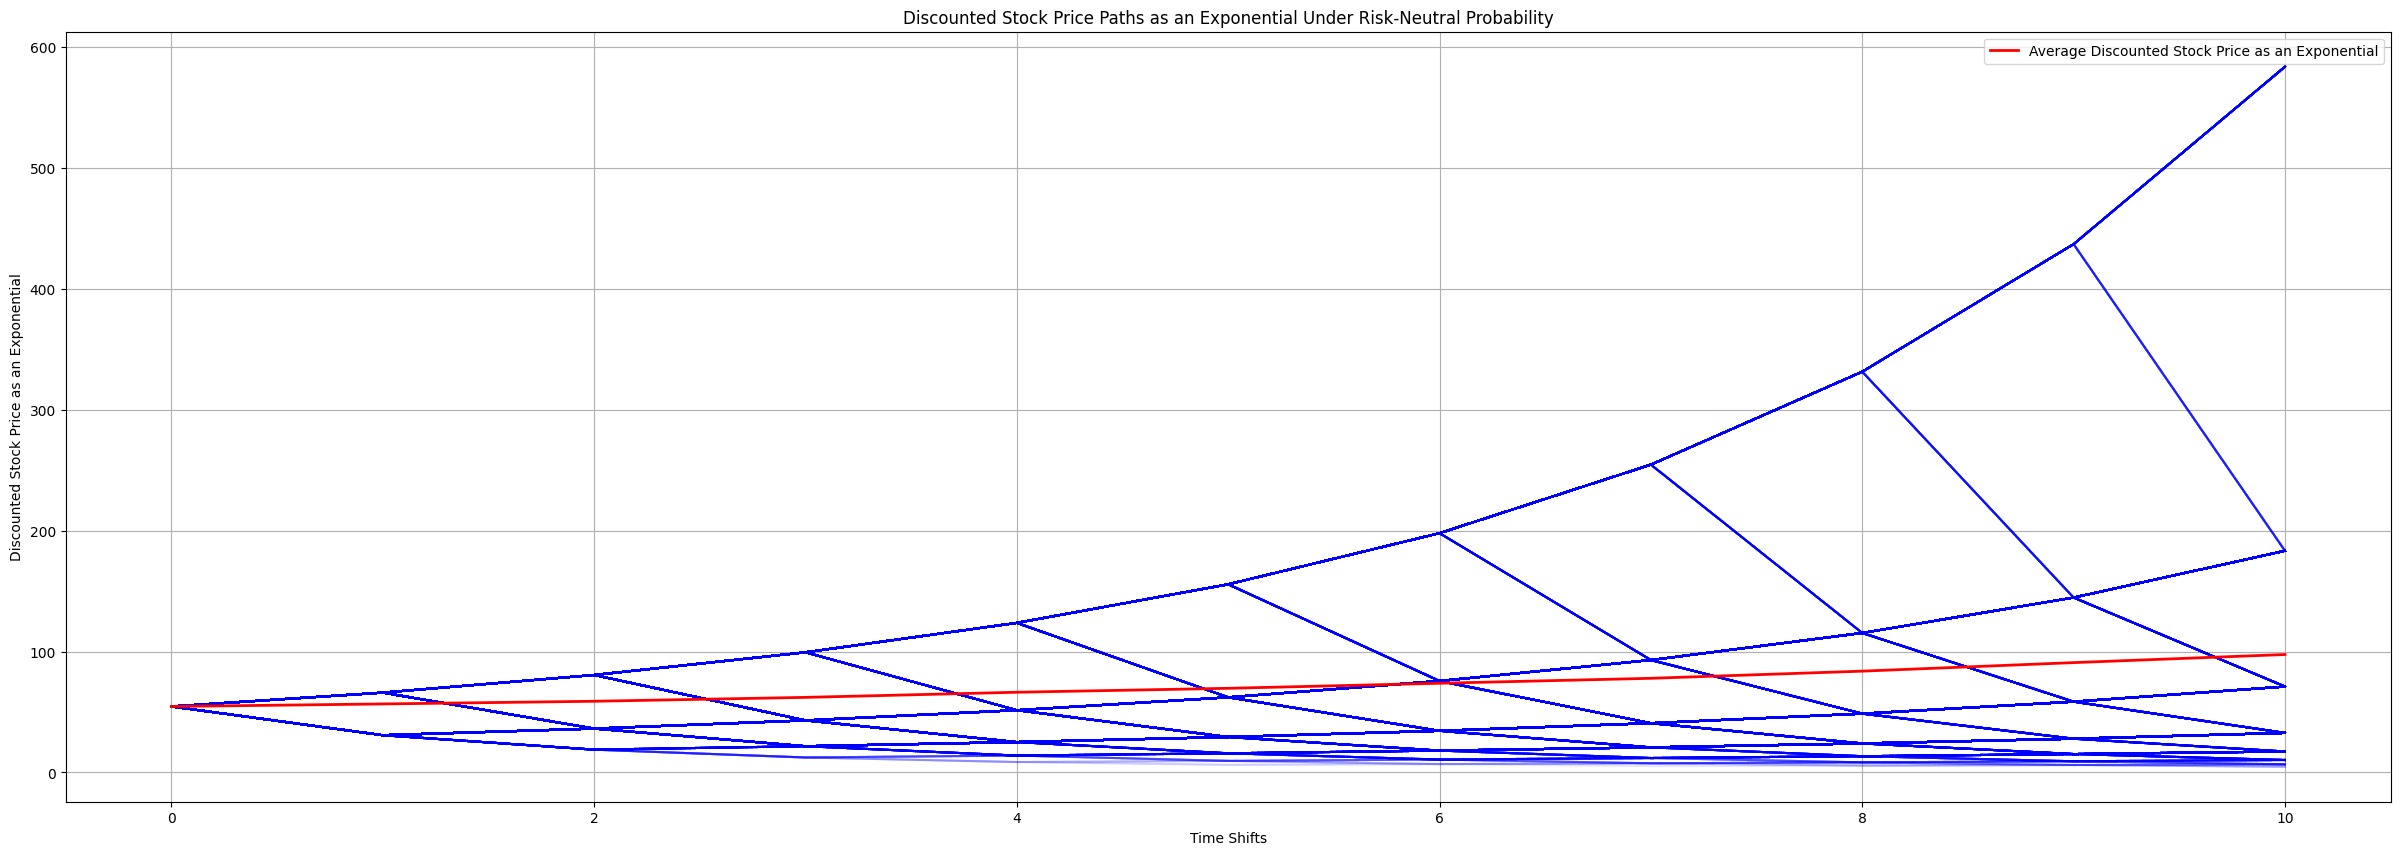

In [14]:
graph_data(all_price_paths, average_price_path, 'Discounted Stock Price as an Exponential', 'Discounted Stock Price Paths as an Exponential Under Risk-Neutral Probability', 'Average Discounted Stock Price as an Exponential')

As you can see, aplying the concave function $e^x$ to `all_price_paths` makes the martingale process of discounted stock prices under risk-neutral probabilities a submartingale process as the average price line has an upward trend.